###Question 1:
Generate a dataset for linear regression with 1000 samples, 5 features and single target.

Visualize the data by plotting the target column against each feature column. Also plot the best fit line in each case.

Hint : search for obtaining regression line using numpy.

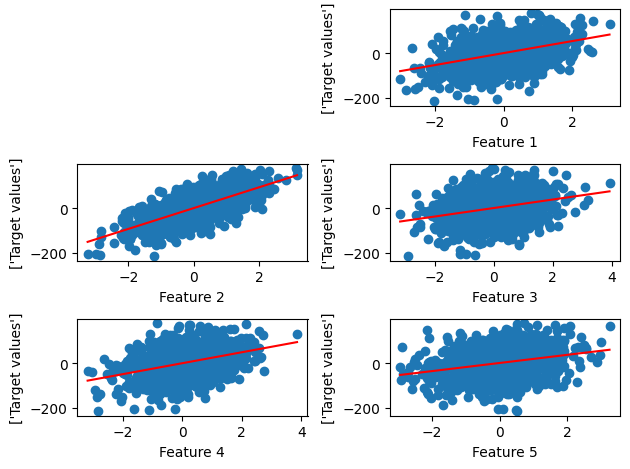

In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

X,y = make_regression(n_samples=1000,n_features=5,random_state=42,noise=10,n_targets=1)
column = ['Feature 1','Feature 2','Feature 3','Feature 4','Feature 5']
column_y = ['Target values']
X= pd.DataFrame(X,columns= column)
y= pd.DataFrame(y,columns=column_y)
c= 1
for i in  X.columns:
    plt.subplot(3,2,c+1)
    plt.scatter(X[i],y)
    plt.xlabel(column[c-1])
    plt.ylabel(column_y)
    c=c+1
    coeffs = np.polyfit(X[i], y[column_y], 1)
    x_vals = np.linspace(X[i].min(), X[i].max(), 100)
    y_vals = np.polyval(coeffs, x_vals)
    plt.plot(x_vals, y_vals, color='red', label='Best Fit Line')

plt.tight_layout()
plt.show()

### Question 2:
Make a classification dataset of 1000 samples with 2 features, 2 classes and 2 clusters per class.
Plot the data.

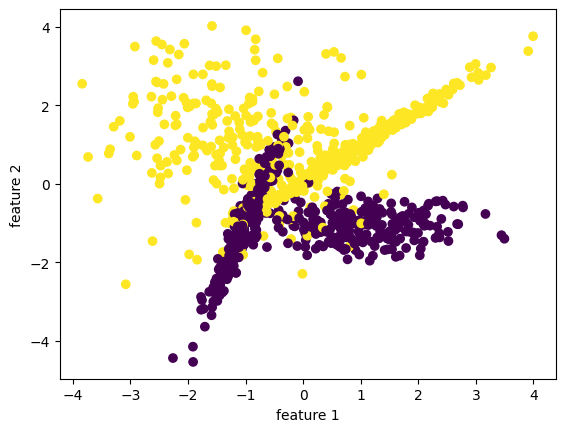

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class=2,n_redundant=0,n_informative=2, random_state=42)
plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.show()




### Question 3:
Make a clustering dataset with 2 features and 4 clusters.

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=2000, n_features=2, centers=4, cluster_std=1.0, random_state=42)

## Question 4
Go to the website https://www.worldometers.info/coronavirus/ and scrape the table containing covid-19 infection and deaths data using requests and BeautifulSoup.  Convert the table to a Pandas dataframe with the following columns : Country, Continent, Population, TotalCases, NewCases, TotalDeaths, NewDeaths,TotalRecovered, NewRecovered,  ActiveCases.

*(<b>Optional Challenge :</b> Change the data type of the Columns (Population ... till ActiveCases) to integer. For that you need to remove the commas and plus signs. You may need to use df.apply() and pd.to_numeric() . Take care of the values which are empty strings.)

In [4]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
base_url = "https://www.worldometers.info/coronavirus/"
request = requests.get(base_url)
soup = BeautifulSoup(request.content,'html.parser')
table = soup.find('table',id = 'main_table_countries_today')
header=[]
first_row = table.find('tr')
for i in first_row.find_all('th'):
    title = i.text
    header.append(title)
header.pop(0)
print(header)
mydata = pd.DataFrame(columns = header)
for j in table.find_all('tr')[1:]:
  row_data = j.find_all('td')
  row = [i.text for i in row_data[1:]]
  length = len(mydata)
  mydata.loc[length] = row
mydata.columns = ['Country', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases', 'Serious,Critical', 'TotalCases/1M pop', 'Deaths/1M pop', 'TotalTests', 'Tests/1M pop', 'Population', 'Continent', '1 Caseevery X ppl', '1 Deathevery X ppl', '1 Testevery X ppl','New Cases exery 1M pop','New Deaths every 1M pop','Active Cases every 1M pop']
df = mydata[['Country','Continent','Population','TotalCases','NewCases','TotalDeaths','NewDeaths','TotalRecovered','NewRecovered','ActiveCases']]
print("please scroll to view the full output\n\n\n\n")
print("The dataframe before optional changes \n\n\n",df)
#code for optional changes

def clean_numeric(x):
    if isinstance(x, str):
        x = x.replace(',', '').replace('+', '')
        if x.isdigit():
            return int(x)
    return pd.NA
for col in df.columns.difference(['Country', 'Continent']):
    cleaned_col = df[col].apply(clean_numeric)
    df.loc[:, col] = pd.to_numeric(cleaned_col, errors='coerce')

print("The dataframe after the optional changes \n\n\n",df)
     

['Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases', 'Serious,Critical', 'Tot\xa0Cases/1M pop', 'Deaths/1M pop', 'TotalTests', 'Tests/\n1M pop\n', 'Population', 'Continent', '1 Caseevery X ppl', '1 Deathevery X ppl', '1 Testevery X ppl', 'New Cases/1M pop', 'New Deaths/1M pop', 'Active Cases/1M pop']
please scroll to view the full output




The dataframe before optional changes 


                Country          Continent Population   TotalCases NewCases  \
0    \nNorth America\n      North America             131,889,132            
1             \nAsia\n               Asia             221,500,265            
2           \nEurope\n             Europe             253,406,198            
3    \nSouth America\n      South America              70,200,879            
4          \nOceania\n  Australia/Oceania              14,895,771            
..                 ...                ...        ...          ...      ...   


# Question 5

Generate an imbalanced classification dataset using sklearn of 1000 samples with 2 features, 2 classes and 1 cluster per class. Plot the data. One of the class should contain only 5% of the total samples. Confirm this either using numpy or Counter. Plot the data.

Now oversample the minority class to 5 times its initial size using SMOTE. Verify the number. Plot the data.

Now undersample the majority class to 3 times the size of minority class using RandomUnderSampler. Verify the number. Plot the data.

Reference : Last markdown cell of the examples.

Imbalanced Dataset Counter({0: 950, 1: 50})


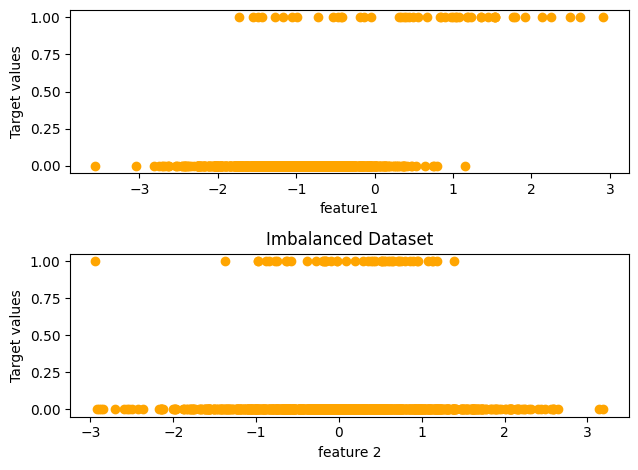

Over sampled dataset Counter({0: 950, 1: 250})


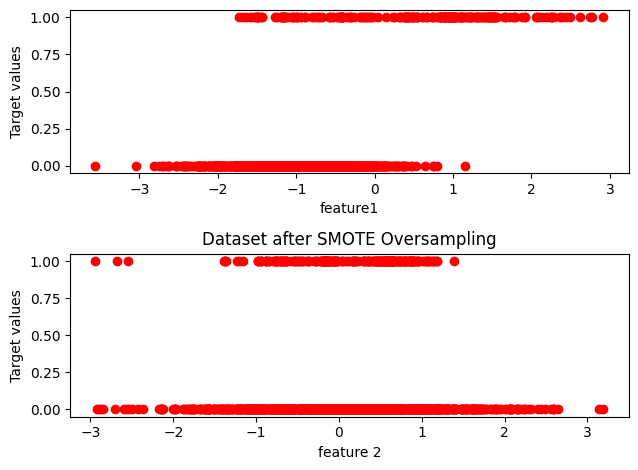

Under sampled dataset Counter({0: 150, 1: 50})


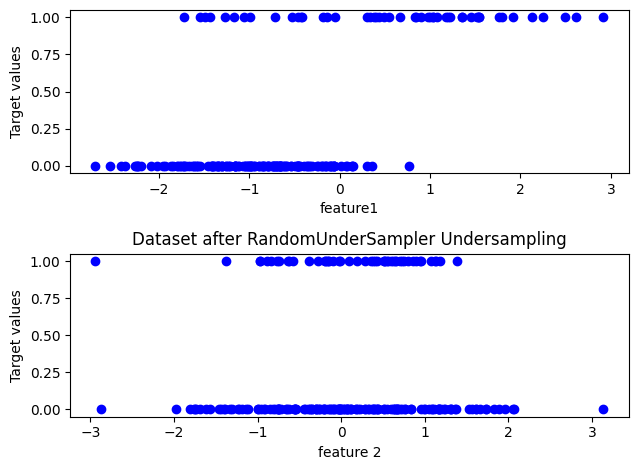

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
col = ["feature1","feature 2"]
X,y = make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=1,random_state=42,n_informative=1,n_redundant=0,n_repeated=0,weights=[0.961])
c = Counter(y)
print("Imbalanced Dataset",c)
for i in range((X.shape)[1]):
    plt.subplot(2,1,i+1)
    plt.scatter(X[:,i],y,color = 'orange')
    plt.xlabel(col[i])
    plt.ylabel("Target values")
plt.title("Imbalanced Dataset")
plt.tight_layout()
plt.show()
l_min = np.sum(y==1)
l_max = np.sum(y==0)
sampling_strategy = {1:l_min*5}
oversampling = SMOTE(sampling_strategy = sampling_strategy,random_state=42)
X_over,y_over = oversampling.fit_resample(X,y)
c = Counter(y_over)
print("Over sampled dataset",c)
for i in range((X_over.shape)[1]):
    plt.subplot(2,1,i+1)
    plt.scatter(X_over[:,i],y_over,color = 'red')
    plt.xlabel(col[i])
    plt.ylabel("Target values")
plt.title("Dataset after SMOTE Oversampling")
plt.tight_layout()
plt.show()

undersampling_strategy = {0:l_min*3}
undersampling = RandomUnderSampler(sampling_strategy=undersampling_strategy,random_state=42)
X_under,y_under = undersampling.fit_resample(X,y)
c = Counter(y_under)
print("Under sampled dataset",c)
for i in range((X_under.shape)[1]):
    plt.subplot(2,1,i+1)
    plt.scatter(X_under[:,i],y_under,color = 'blue')
    
    plt.xlabel(col[i])
    plt.ylabel("Target values")
plt.title("Dataset after RandomUnderSampler Undersampling")
plt.tight_layout()
plt.show()

##Question 6

Write a Python code to perform data preprocessing on a dataset using the scikit-learn library. Follow the instructions below:

 * Load the dataset using the scikit-learn `load_iris` function.
 * Assign the feature data to a variable named `X` and the target data to a variable named `y`.
 * Create a pandas DataFrame called `df` using `X` as the data and the feature names obtained from the dataset.
 * Display the first 5 rows of the DataFrame `df`.
 *  Check if there are any missing values in the DataFrame and handle them accordingly.
 * Split the data into training and testing sets using the `train_test_split` function from scikit-learn. Assign 70% of the data to the training set and the remaining 30% to the testing set.
 * Print the dimensions of the training set and testing set respectively.
 *  Standardize the feature data in the training set using the `StandardScaler` from scikit-learn.
 *  Apply the same scaling transformation on the testing set.
 * Print the first 5 rows of the standardized training set.

In [47]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = load_iris()
X= data.data
y = data.target
df = pd.DataFrame(X)
print(df.head(),"\n\n")
missing_value = df.isna().sum()
print(missing_value,"\n\n")
df_f=df.fillna(df.mean())
missing_value = df_f.isna().sum()
print(missing_value,"\n\n")
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.3)
print("X_train, X_test, Y_train, Y_test")
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape,"\n\n")
scalestand = StandardScaler()
X_train_norm = scalestand.fit_transform(X_train)
X_test_norm = scalestand.fit_transform(X_test)
print(X_train_norm[0:5,:])


     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2 


0    0
1    0
2    0
3    0
dtype: int64 


0    0
1    0
2    0
3    0
dtype: int64 


X_train, X_test, Y_train, Y_test
(105, 4) (45, 4) (105,) (45,) 


[[ 0.57966157 -0.82285314  0.66028714  0.77513328]
 [-1.41589466  0.2934205  -1.43006914 -1.35268357]
 [ 0.45493931 -0.37634368  0.31189443  0.11019052]
 [ 0.8291061  -0.15308896  1.00867986  0.77513328]
 [-1.2911724  -0.15308896 -1.37200369 -1.21969501]]
